In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
from modAL.models import ActiveLearner, CommitteeRegressor
from modAL.disagreement import max_std_sampling

In [4]:
# generating the data
X = np.concatenate((np.random.rand(100)-1, np.random.rand(100)))
y = np.abs(X) + np.random.normal(scale=0.2, size=X.shape)

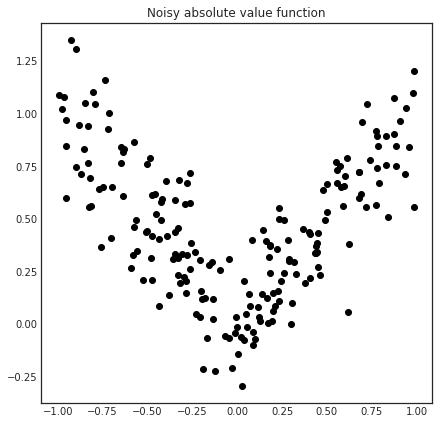

In [5]:
# visualizing the data
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    plt.scatter(X, y, c='k')
    plt.title('Noisy absolute value function')
    plt.show()

In [6]:
# initializing the regressors
n_initial = 10
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
         + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

initial_idx = list()
initial_idx.append(np.random.choice(range(100), size=n_initial, replace=False))
initial_idx.append(np.random.choice(range(100, 200), size=n_initial, replace=False))
learner_list = [ActiveLearner(
                        estimator=GaussianProcessRegressor(kernel),
                        X_training=X[idx].reshape(-1, 1), y_training=y[idx].reshape(-1, 1)
                )
                for idx in initial_idx]

In [7]:
# initializing the Committee
committee = CommitteeRegressor(
    learner_list=learner_list,
    query_strategy=max_std_sampling
)

In [10]:
pred, std = committee.predict(x.reshape(-1, 1), return_std=True)
pred = pred.reshape(-1, )
std = std.reshape(-1, )

In [12]:
pred[0:25]

array([0.33378414, 0.32544828, 0.31668244, 0.30750057, 0.29791801,
       0.28795144, 0.27761887, 0.26693961, 0.25593423, 0.24462449,
       0.23303335, 0.22118486, 0.20910412, 0.19681722, 0.18435117,
       0.17173384, 0.15899385, 0.14616051, 0.13326375, 0.12033401,
       0.10740214, 0.09449934, 0.08165704, 0.0689068 , 0.05628023])

In [13]:
std[0:25]

array([0.77670243, 0.77591322, 0.77442572, 0.7722304 , 0.76931888,
       0.76568389, 0.76131935, 0.75622038, 0.75038329, 0.74380565,
       0.73648628, 0.72842529, 0.71962404, 0.71008521, 0.69981275,
       0.68881194, 0.67708931, 0.66465271, 0.65151127, 0.63767537,
       0.62315667, 0.60796804, 0.59212358, 0.57563859, 0.5585295 ])

In [14]:
# active regression
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance = committee.query(X.reshape(-1, 1))
    committee.teach(X[query_idx].reshape(-1, 1), y[query_idx].reshape(-1, 1))

In [15]:
pred, std = committee.predict(x.reshape(-1, 1), return_std=True)
pred = pred.reshape(-1, )
std = std.reshape(-1, )

In [16]:
pred[0:25]

array([1.06042712, 1.06372542, 1.06524695, 1.06493599, 1.06274295,
       1.05862495, 1.0525465 , 1.04448007, 1.03440673, 1.0223167 ,
       1.00820992, 0.99209654, 0.97399737, 0.9539443 , 0.93198062,
       0.90816133, 0.88255327, 0.85523527, 0.82629818, 0.79584474,
       0.76398944, 0.73085823, 0.6965881 , 0.66132659, 0.62523119])

In [17]:
std[0:25]

array([0.01585266, 0.01808161, 0.0201775 , 0.02212566, 0.02391254,
       0.02552586, 0.02695477, 0.02818997, 0.0292239 , 0.03005077,
       0.03066671, 0.03106982, 0.03126021, 0.03124006, 0.03101359,
       0.03058705, 0.02996865, 0.02916853, 0.02819863, 0.02707255,
       0.02580544, 0.02441379, 0.0229153 , 0.02132858, 0.01967301])

In [ ]:
# after few queries differences are smmothed out and regressors reach an agreement